In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001038205"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001038205
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,BANK OF THE OZARKS INC
Ticker,


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,37.0,15.73,3.429238e+00,10.67,12.81,15.45,17.16,2.363000e+01
interest income,2.0,42883500.00,3.348151e+06,40516000.00,41699750.00,42883500.00,44067250.00,4.525100e+07
net income,40.0,27258500.00,2.156174e+07,7737000.00,10579500.00,19637500.00,36037500.00,8.918800e+07
net interest income,40.0,60464325.00,4.483796e+07,20406000.00,30316000.00,43802000.00,75634500.00,1.948000e+08
provision for loan losses,40.0,4331675.00,3.835340e+06,-6315000.00,2721000.00,3718500.00,5002500.00,2.110000e+07


# Plots

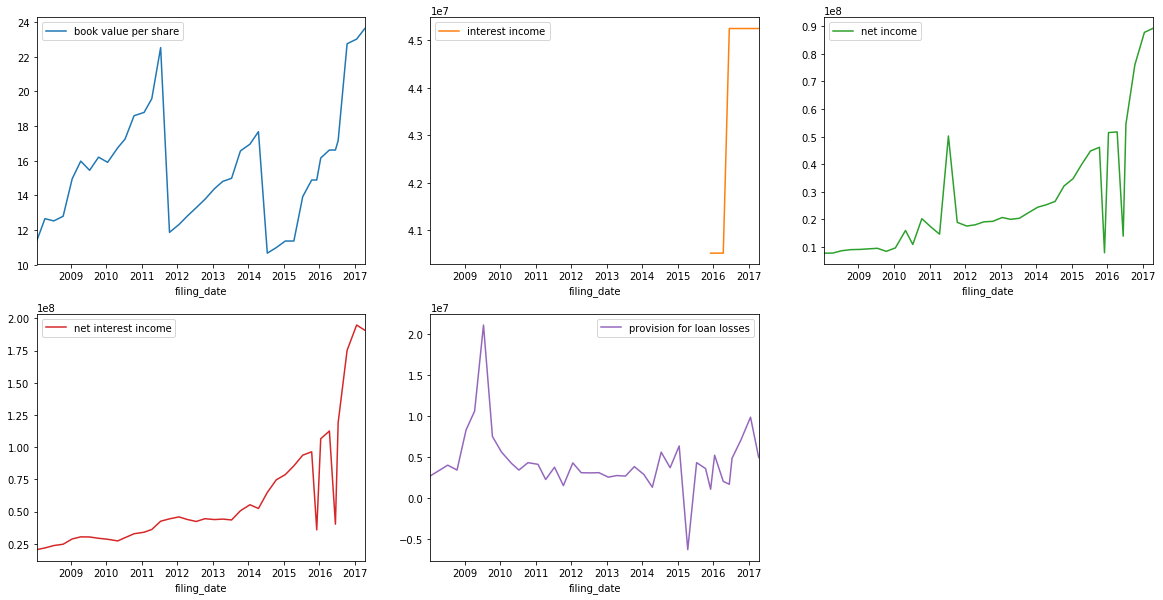

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0001038205 book value per share                             2015Q1    missing   
           interest income            2007Q4 to 2015Q2: 31 periods    missing   
           interest income                                  2015Q4    missing   
           interest income             2016Q2 to 2017Q1: 4 periods    missing   
           net income                                       2015Q3  duplicate   
           net income                                       2016Q1  duplicate   
           net interest income                              2015Q3  duplicate   
           net interest income                              2016Q1  duplicate   
           provision for loan losses                        2015Q3  duplicate   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0001038205 book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                   Duplicate period  
           net income                   Duplicate period  
           net interest income          Duplicate period  
           net interest income          Duplicate period  
           provision for loan losses    Duplicate period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()